<!-- KODE = "ja", "nei", default "ja" -->

<!-- dom:TITLE: Numerical integration  -->
# Numerical integration: Part III 
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø**, revised by **Markus Grasmair, André Massing**

Date: **Feb 1, 2021** 

In this note, we will discuss **practical error estimate** for numerical
integration and **adaptive integration**.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [21]:
%matplotlib inline
newparams = {
    "figure.figsize": (8.0, 4.0),
    "axes.grid": True,
    "lines.markersize": 8,
    "lines.linewidth": 2,
    "font.size": 14,
}
rcParams.update(newparams)

## Error estimate
To simplify notation a bit, we will now write $S_{m}\left(a,b\right)$
instead of
$
\mathrm{CSR}\left[f\right]
\left({\left[x_{i-1}, x_{i}\right]}_{i=1}^{m}\right).
$

From a practical point of view, the error expression derived for the composite Simpson's rule has some
limitations, the main difficulty being that it depends on the unknown value $f^{\left(4\right)}\left(\xi\right)$.
In practice, we can at best use an error estimate of the form
$$
\lvert
I\left(a,b\right)-
S_{m}\left(a,b\right)
\rvert\le
\dfrac{\left(b-a\right)h^{4}}{2880}
{\lVert f^{\left(4\right)}\rVert}_{\infty}.
$$
This bound, however, often vastly overestimates the actual error.
In addition, we do not always
know (or want to find) ${\lVert f^{\left(4\right)}\rVert}_\infty$.
So the question arises:
How can we find an estimate of the error, without any extra analytical
calculations? 

This is the idea: 
Let the interval $\left(a,b\right)$ chosen small, such that $f^{\left(4\right)}\left(x\right)$ can be
assumed to be almost constant over the interval. Let $H=b-a$ be the length of the interval.
Let $S_{1}\left(a,b\right)$ and $S_{2}\left(a,b\right)$ be the results from Simpson's formula over one and two subintervals respectively. Further, let $C=-\dfrac{f^{\left(4\right)}\left(x\right)}{2880}$ for some $x\in\left[a,b\right]$ --- which $x$ does not matter, as $f^{\left(4\right)}$ is assumed almost constant anyway. 

The errors of the two approximations are then given by
\begin{align*}
I\left(a,b\right)-S_{1}\left(a,b\right) &\approx CH^{5},  \\ 
I\left(a,b\right)-S_{2}\left(a,b\right) &\approx 2C{\left(\frac{H}{2}\right)}^{5}.
\end{align*}

Subtract the two expressions to eliminate $I\left(a,b\right)$:

$$
S_{2}\left(a,b\right)-
S_{1}\left(a,b\right)\approx
\frac{15}{16}
CH^{5}\quad\Longrightarrow\quad
CH^{5}\approx\dfrac{16}{15}
\left(
S_{2}\left(a,b\right)-
S_{1}\left(a,b\right)
\right).
$$

Insert this  in the expression for the error:

\begin{equation}
E_{1}\left(a,b\right)=
I\left(a,b\right)-
S_{1}\left(a,b\right)\approx
\dfrac{16}{15}
\left(S_{2}\left(a,b\right)-S_{1}\left(a,b\right)\right)=
\mathcal{E}_{1}\left(a,b\right), 
\tag{13}
\end{equation}

\begin{equation}
E_{2}\left(a,b\right)=
I\left(a,b\right)-
S_{2}\left(a,b\right)\approx
\frac{1}{15}\left(S_{2}\left(a,b\right)-S_{1}\left(a,b\right)\right)=
\mathcal{E}_{2}\left(a,b\right).
\tag{14}
\end{equation}

This gives us a computable estimate for the error, both in $S_{1}$ and $S_{2}$.
As the error in $S_{2}\left(a,b\right)$ is about $\frac{1}{16}$ of the error in $S_{1}\left(a,b\right)$,
and we anyway need to compute both, we will use $S_{2}\left(a,b\right)$ as our approximation.
An even better approximation to the integral is given for free by just adding the error estimate:
$$
I\left(a,b\right)\approx
S_{2}\left(a,b\right)+
\mathcal{E}_{2}\left(a,b\right)=
\frac{16}{15} S_{2}\left(a,b\right)-
\frac{1}{15} S_{1}\left(a,b\right).
$$

**Example 5:**
Find an approximation to the integral $\int\limits_{0}^{1}\cos\left(x\right)\mathrm{d}x=\sin\left(1\right)$ by Simpson's
rule over one and two subintervals. Find the error estimates $\mathcal{E}_m$,
$m=1,2$  and compare with the exact error. 

*Solution:*

\begin{equation}
S_{1}\left(0,1\right)=
\frac{1}{6}
\big[\cos\left(0.0\right)+4\cos\left(0.5\right)+\cos\left(1.0\right)\big]=
0.8417720923 
\tag{15}
\end{equation}

\begin{equation}  
S_{2}\left(0,1\right)=
\frac{1}{12}
\big[\cos\left(0.0\right)+
4\cos\left(0.25\right)+
2\cos\left(0.5\right)+
4\cos\left(0.75\right)+
\cos\left(1.0\right)\big]=
0.8414893826
\tag{16}
\end{equation}

The exact error and the error estimate become:

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

\begin{equation}
E_1(0,1) = \sin(1) - S_1(0,1) = -3.011 \cdot 10^{-4}, \quad
\mathcal{E}_1(0,1) = \frac{16}{15}(S_2-S_1) = -3.016\cdot 10^{-4},  
\label{_auto17} \tag{17}
\end{equation}

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

\begin{equation}  
E_2(0,1) = \sin(1)-S_2(0,1) = -1.840 \cdot 10^{-5}, \quad 
\mathcal{E}_2(0,1) = \frac{1}{16} (S_2-S_1) = -1.885 \cdot 10^{-5}.
\label{_auto18} \tag{18}
\end{equation}

In this case, it is a very good correspondence between the error estimate and
the exact error. An even better approximation is obtained by adding the error
estimate to $S_{2}$:

$$
Q=
S_{2}\left(0,1\right)+
\mathcal{E}_{2}\left(0,1\right)=
0.8414705353607151.
$$

with an error $\sin\left(1\right)-Q=4.4945\cdot 10^{-7}$. This gives a lot of additional
accuracy without any extra work. 

### Implementation of Simpson's method with an error estimate

The function `simpson_basic` returns

$$
S_{2}\left(a,b\right)\approx
\int\limits_{a}^{b}
f\left(x\right)\mathrm{d}x
$$

including an error estimate.

In [22]:
def simpson_basic(f, a, b):
    # Simpson's method with error estimate
    # Input:
    #   f:    integrand
    #   a, b: integration interval
    # Output:
    #   S_2(a,b) and the error estimate.

    # The nodes
    c = 0.5 * (a + b)
    d = 0.5 * (a + c)
    e = 0.5 * (c + b)

    # Calculate S1=S_1(a,b), S2=S_2(a,b)
    H = b - a
    S1 = H * (f(a) + 4 * f(c) + f(b)) / 6
    S2 = 0.5 * H * (f(a) + 4 * f(d) + 2 * f(c) + 4 * f(e) + f(b)) / 6

    error_estimate = (S2 - S1) / 15  # Error estimate for S2
    return S2, error_estimate

**Test:**
As a first check of the implementation, use the example above, and make sure
that the results are the same:

In [23]:
# Test of simpson_basic


def f(x):  # Integrand
    return np.cos(x)


a, b = 0, 1  # Integration interval

I_exact = np.sin(1)  # Exact solution for comparision

# Simpson's method over two intervals, with error estimate
S, error_estimate = simpson_basic(f, a, b)

# Print the result and the exact solution
print(f"Numerical solution = {S:.8f}, exact solution = {I_exact:.8f}")

# Compare the error and the error estimate
print(
    "Error in S2 = {:.3e},  error estimate for S2 = {:.3e}".format(
        I_exact - S, error_estimate
    )
)

Numerical solution = 0.84148938, exact solution = 0.84147098
Error in S2 = -1.840e-05,  error estimate for S2 = -1.885e-05


Next, let us see how reliable the quadrature and the error estimates are for
another example, which you have to do yourself: 

**Numerical experiment 3:**
Given the integral (with solution)

$$
I\left(a,b\right)=
\int\limits_{a}^{b}
\dfrac{\mathrm{d}x}{1+16x^{2}}=
{\left.\dfrac{\arctan\left(4x\right)}{4}\right|}_{a}^{b}
$$

1. Use `simpson_basic` to find an approximation to the integral over the interval $\left[0,8\right]$. Print out $S_{2}\left(0,8\right)$, the error estimate $\mathcal{E}_{2}\left(0,8\right)$ and the real error $E_{2}\left(0,8\right)$. How reliable are the error estimates?

2. Repeat the experiment over the intervals $\left[0,1\right]$ and $\left[4, 8\right]$. Notice the difference between exact error of the two intervals.

3. Repeat the experiment over the interval $\left[0,0.1\right]$.

**Please do this numerical experiment at home!** 

This is what you should observe from the experiment:
1. Interval $\left[0,8\right]$: The error is large, and the error estimate is significantly smaller than the real error (the error is *under-estimated*).

2. Interval $\left[0,1\right]$: As for the interval $\left[0,8\right]$.

3. Interval $\left[4,8\right]$: Small error, and a reasonable error estimate.

4. Interval $\left[0,0.1\right]$: Small error, reasonable error estimate.

Why is it so, and how can we deal with it? Obviously, we need small subintervals
near $x=0$, while large subintervals are acceptable in the last half of the
interval. 

**Explanation:**
The error in Simpson's method is given by

$$
E\left(a,b\right)=
-\dfrac{{\left(b-a\right)}^{5}}{2880}f^{\left(4\right)}\left(\xi\right).
$$

So let us take a look at $f^{\left(4\right)}\left(x\right)$:

$$
f\left(x\right)=
\dfrac{1}{1+16x^2}\quad\Longrightarrow\quad
f^{\left(4\right)}\left(x\right)=6144
\frac{1280 x^{4}-160x^{2}+1}{\left(1-16x^{2}\right)^{5}}
$$

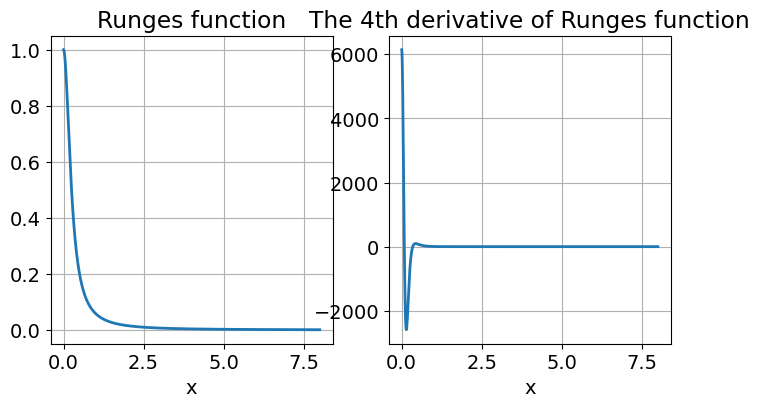

In [14]:
# Plot the 4th derivate of Runge's function:


def f(x):
    return 1 / (1 + 16 * x**2)


def df4(x):
    return 6144 * (1280 * x**4 - 160 * x**2 + 1) / ((1 + 16 * x**2) ** 5)


x = np.linspace(0, 8, 1001)

plt.subplot(1, 2, 1)
plt.plot(x, f(x))
plt.title("Runges function")
plt.xlabel("x")

plt.subplot(1, 2, 2)
plt.plot(x, df4(x))
plt.title("The 4th derivative of Runges function")
plt.xlabel("x");

It is no surprise that the error is large and the error estimates fail (we have assumed $f^{\left(4\right)}$ almost constant for the estimates) over the interval $\left[0,1\right]$. The part of the interval where $f^{\left(4\right)}\left(x\right)$ is large has to be partitioned in significantly smaller subintervals to get an acceptable result. But how, as $f^{\left(4\right)}$ is in general not known? This is the topic of the next section. 

## Adaptive integration

Given a basic function, for example `simpson_basic`, returning an approximation $Q\left(a,b\right)$ to the integral, as well as an error estimate $\mathcal{E}\left(a,b\right)$. Based on this, we want to find a partitioning of the interval:

$$
a=
X_{0}<X_{1}\cdots<X_{m}=
b
$$

such that

$$
\left|\mathcal{E}\left(X_{j},X_{j+1}\right)\right|\approx
\frac{X_{k+1}-X_k}{b-a}\cdot\text{Tol}
$$

where $\text{Tol}$ is a tolerance given by the user.

In this case

$$
\text{Accumulated error over $\left(a,b\right)$}\approx
\sum_{j=0}^{m-1}
\mathcal{E}\left(X_{k},X_{k+1}\right)\leq
\text{Tol}.
$$

Such a partitioning can be done by an recursive algorithm:

**Algorithm: Adaptive quadrature.**

Given $f$, $a$, $b$ and a user defined tolerance Tol.
* Calculate $Q\left(a,b\right)$ and $\mathcal{E}\left(a,b)$.

* **if** $|\mathcal{E}(a,b)| \leq \text{Tol}$:

    * Accept the result, return $Q(a,b) + \mathcal{E}(a,b)$ as an approximation to $I(a,b)$.


* **else**:

    * Let $c=(a+b)/2$, and repeat the process on each of the subintervals $[a,c]$ and $[c,b]$, with tolerance  $\text{Tol}/2$.


* Sum up the accepted results from each subinterval.

### Implementation

The adaptive algorithm is implemented below with `simpson_basic` as the basic quadrature routine. 
The function `simpson_adaptive` is a recursive function, that is a function that calls itself.
To avoid it to do so infinitely many times, an extra variable `level` is introduced, this will increase by one for each time the function calls itself. If `level` is over some maximum value, the result is returned, and a warning printed.

In [15]:
def simpson_basic(f, a, b):
    # Simpson's method with error estimate
    # Input:
    #   f:    integrand
    #   a, b: integration interval
    # Output:
    #   S_2(a,b) and the error estimate.

    # The nodes
    c = 0.5 * (a + b)
    d = 0.5 * (a + c)
    e = 0.5 * (c + b)

    # Calculate S1=S_1(a,b), S2=S_2(a,b)
    H = b - a
    S1 = H * (f(a) + 4 * f(c) + f(b)) / 6
    S2 = 0.5 * H * (f(a) + 4 * f(d) + 2 * f(c) + 4 * f(e) + f(b)) / 6

    error_estimate = (S2 - S1) / 15  # Error estimate for S2
    return S2, error_estimate

In [18]:
def simpson_adaptive(f, a, b, tol=1.0e-6, level=0, maks_level=15):
    # Simpson's adaptive method
    # Input:
    #   f:    integrand
    #   a, b: integration interval
    #   tol:  tolerance
    #   level, maks_level: For the recursion. Just ignore them.
    # Output:
    #   The approximation to the integral

    Q, error_estimate = simpson_basic(f, a, b)  # The quadrature and the error estimate

    # -------------------------------------------------
    # Write the output, and plot the nodes.
    # This part is only for illustration.
    if level == 0:
        print(" l   a           b         feil_est   tol")
        print("==============================================")
    print(
        "{:2d}   {:.6f}   {:.6f}   {:.2e}   {:.2e}".format(
            level, a, b, abs(error_estimate), tol
        )
    )

    x = np.linspace(a, b, 101)
    plt.plot(x, f(x), [a, b], [f(a), f(b)], ".r")
    plt.title("The integrand and the subintervals")
    # -------------------------------------------------

    if level >= maks_level:
        print("Warning: Maximum number of levels used.")
        return Q

    if abs(error_estimate) < tol:  # Accept the result, and return
        result = Q + error_estimate
    else:
        # Divide the interval in two, and apply the algorithm to each interval.
        c = 0.5 * (b + a)
        result_left = simpson_adaptive(f, a, c, tol=0.5 * tol, level=level + 1)
        result_right = simpson_adaptive(f, c, b, tol=0.5 * tol, level=level + 1)
        result = result_right + result_left
    return result

**Numerical experiment 4:**
Use adaptive Simpson to find an approximation to the integral $ \int_0^5 1/(1+16x^2)dx $ using the tolerances Tol=$10^{-3}, 10^{-5}, 10^{-7}$. Compare the numerical result with the exact one.

 l   a           b         feil_est   tol
 0   0.000000   8.000000   4.25e-02   1.00e-03
 1   0.000000   4.000000   1.85e-02   5.00e-04
 2   0.000000   2.000000   5.11e-03   2.50e-04
 3   0.000000   1.000000   7.84e-04   1.25e-04
 4   0.000000   0.500000   6.41e-04   6.25e-05
 5   0.000000   0.250000   3.43e-05   3.13e-05
 6   0.000000   0.125000   1.21e-06   1.56e-05
 6   0.125000   0.250000   1.31e-06   1.56e-05
 5   0.250000   0.500000   7.82e-07   3.13e-05
 4   0.500000   1.000000   1.45e-05   6.25e-05
 3   1.000000   2.000000   1.40e-05   1.25e-04
 2   2.000000   4.000000   8.29e-06   2.50e-04
 1   4.000000   8.000000   4.33e-06   5.00e-04

Numerical solution = 0.384903, exact solution = 0.384889

Tolerance = 1.0e-03, error = 1.343e-05


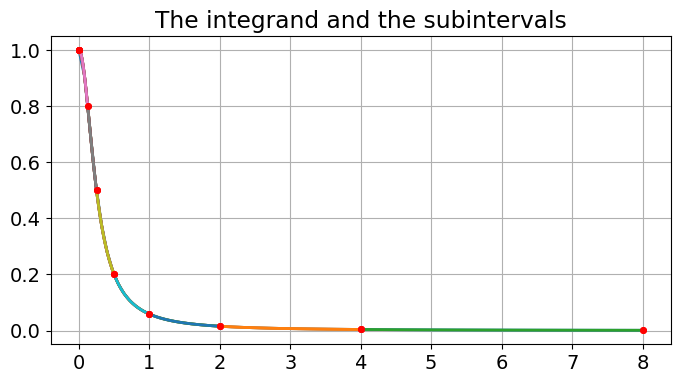

In [19]:
# Test: The adaptive Simpson's method


def f(x):  # Integrand
    return 1 / (1 + (4 * x) ** 2)


a, b = 0, 8  # Integration interval
I_exact = 0.25 * (np.arctan(4 * b) - np.arctan(4 * a))  # Exact integral
tol = 1.0e-3  # Tolerance
# Apply the algorithm
result = simpson_adaptive(f, a, b, tol=tol)
# Print the result and the exact solution
print(f"\nNumerical solution = {result:8f}, exact solution = {I_exact:8f}")
# Compare the measured error and the tolerance
err = I_exact - result
print(f"\nTolerance = {tol:.1e}, error = {abs(err):.3e}")